In [ ]:
#Importing the necessary libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers import BatchNormalization

In [ ]:
#Defining the function to return a compiled AlexNet Model with input shape (32, 32, 3)
def create_model():
  model = Sequential()
  model.add(Conv2D(96, (11, 11), input_shape = (32, 32, 3), padding='same', kernel_regularizer='l2'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(256, (5,5), padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(256, (5,5), padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(ZeroPadding2D((1,1)))
  model.add(Conv2D(512, (3,3), padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(ZeroPadding2D((1,1)))
  model.add(Conv2D(1024, (3,3), padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))

  model.add(ZeroPadding2D((1,1)))
  model.add(Conv2D(1024, (3,3), padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Flatten())
  model.add(Dense(3072))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.5))

  model.add(Dense(4096))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.5))

  model.add(Dense(num_classes))
  model.add(BatchNormalization())
  model.add(Activation('softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
  return model 

In [ ]:
#Loading the Cifar10 Dataset from Tensorflow datasets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
#Multi-dimensional array to a Single-dimensional array
y_train = y_train.flatten()
y_test = y_test.flatten()

In [ ]:
#Classes in the Cifar10 Dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
#Reshape 50000 tensors into a single 50000*32*32*3 array
x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 3)
x_train=x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 3)
x_test=x_test / 255.0

In [ ]:
#One-hot Encoding for prediction labels
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)
y_train[0]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)>

tf.Tensor([0. 0. 0. 0. 1. 0. 0. 0. 0. 0.], shape=(10,), dtype=float32)


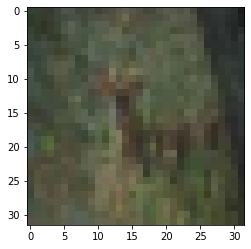

In [ ]:
#Visualising training dataset
plt.imshow(x_train[10])
print(y_train[10])

In [ ]:
#Hyper-parameters for the model
batch_size = 32
num_classes = 10
epochs = 40

In [ ]:
#Instantiating model and model summary
model = create_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 96)        34944     
                                                                 
 batch_normalization_27 (Bat  (None, 32, 32, 96)       384       
 chNormalization)                                                
                                                                 
 activation_27 (Activation)  (None, 32, 32, 96)        0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 16, 16, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 256)       614656    
                                                                 
 batch_normalization_28 (Bat  (None, 16, 16, 256)     

In [ ]:
#Training model
history = model.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(
                            monitor='loss',
                            patience=1,
                            restore_best_weights=True
                        )
                    ])

Epoch 1/40
1563/1563 [==============================] - 84s 54ms/step - loss: 1.2804 - accuracy: 0.5715
Epoch 2/40
1563/1563 [==============================] - 83s 53ms/step - loss: 1.0862 - accuracy: 0.6459
Epoch 3/40
1563/1563 [==============================] - 83s 53ms/step - loss: 0.9409 - accuracy: 0.7020
Epoch 4/40
1563/1563 [==============================] - 83s 53ms/step - loss: 0.8167 - accuracy: 0.7442
Epoch 5/40
1563/1563 [==============================] - 83s 53ms/step - loss: 0.7053 - accuracy: 0.7839
Epoch 6/40
1563/1563 [==============================] - 83s 53ms/step - loss: 0.6007 - accuracy: 0.8193
Epoch 7/40
1563/1563 [==============================] - 84s 53ms/step - loss: 0.4923 - accuracy: 0.8570
Epoch 8/40
1563/1563 [==============================] - 83s 53ms/step - loss: 0.4027 - accuracy: 0.8873
Epoch 9/40
1563/1563 [==============================] - 82s 53ms/step - loss: 0.3355 - accuracy: 0.9112
Epoch 10/40
1563/1563 [==============================] - 83s 53m

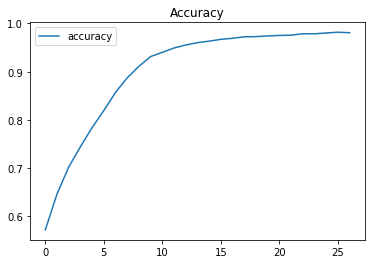

In [ ]:
# accuracy visualization
pd.DataFrame(history.history)[['accuracy']].plot()
plt.title("Accuracy")
plt.show()

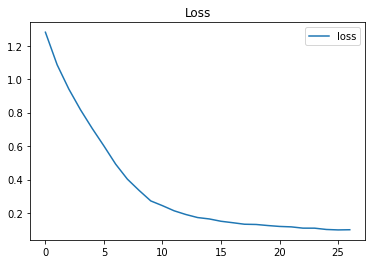

In [ ]:
#loss visualisation
pd.DataFrame(history.history)[['loss']].plot()
plt.title("Loss")
plt.show()

In [ ]:
#testing an image
from tensorflow.keras.utils import img_to_array, load_img

path = '/content/aeroplane.jpg'
img = load_img(path, target_size=(32, 32))
x = img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
prediction = np.argmax(classes[0])
print(class_names[prediction])

1/1 [==============================] - 0s 17ms/step
airplane


(1, 32, 32, 3)


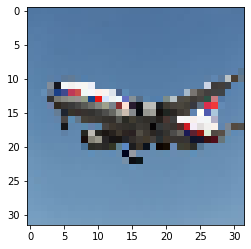

In [ ]:
plt.imshow(classes)
plt.imshow(x[0])
print (x.shape)

In [ ]:
from tensorflow.keras.models import Model

layer_outputs = [layer.output for layer in model.layers[:len(model.layers)]]
activation_modelfig = Model(inputs=model.input, outputs=layer_outputs)
activationsfig = activation_modelfig.predict(x)

1/1 [==============================] - 0s 230ms/step


(1, 32, 32, 96)


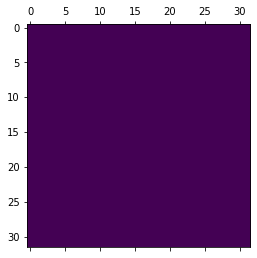

In [ ]:
first_layer_activation = activationsfig[0]
print(first_layer_activation.shape)
plt.matshow(first_layer_activation[0, :, :, 2], cmap='viridis')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes curr

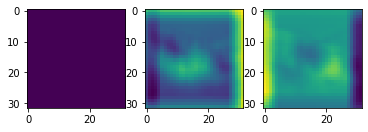

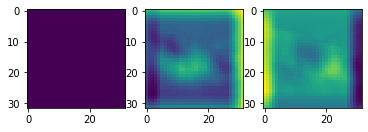

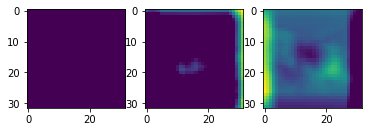

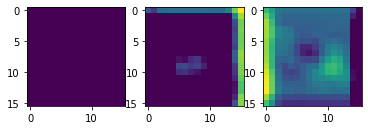

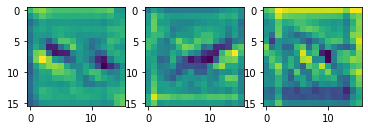

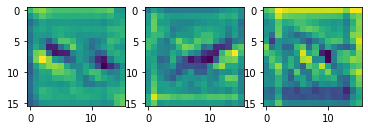

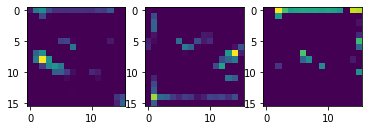

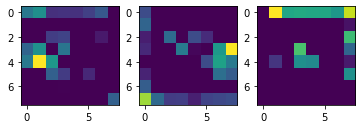

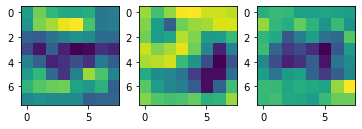

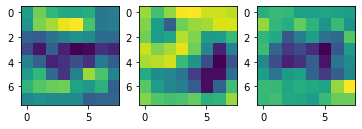

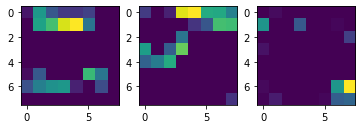

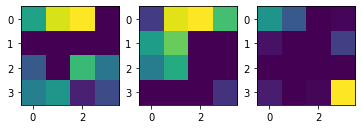

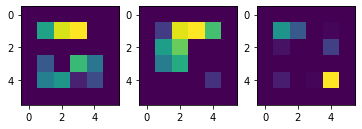

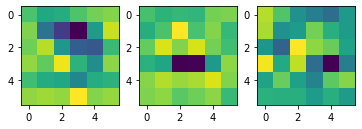

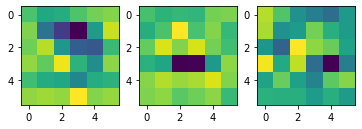

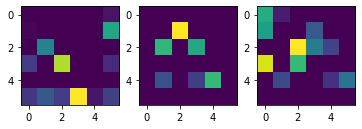

In [ ]:
for i in range(0,16):
    current_layer_activation = activationsfig[i]
    ns = current_layer_activation.shape[-1]
    fig = plt.figure()
    ax1 = fig.add_subplot(131)
    plt.subplot(131)
    plt.imshow(current_layer_activation[0, :, :, 0], cmap='viridis')
    
    ax3 = fig.add_subplot(132)
    plt.subplot(132)
    plt.imshow(current_layer_activation[0, :, :, int(ns/2)], cmap='viridis')
    
    ax5 = fig.add_subplot(133)
    plt.subplot(133)
    plt.imshow(current_layer_activation[0, :, :, ns-1], cmap='viridis')